In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from glob import glob

In [ ]:
IMAGE_SIZE = 64

In [ ]:
train_path = '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train'
test_path = '/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/test'

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

folder = train_path + '/oval/0.jpg'

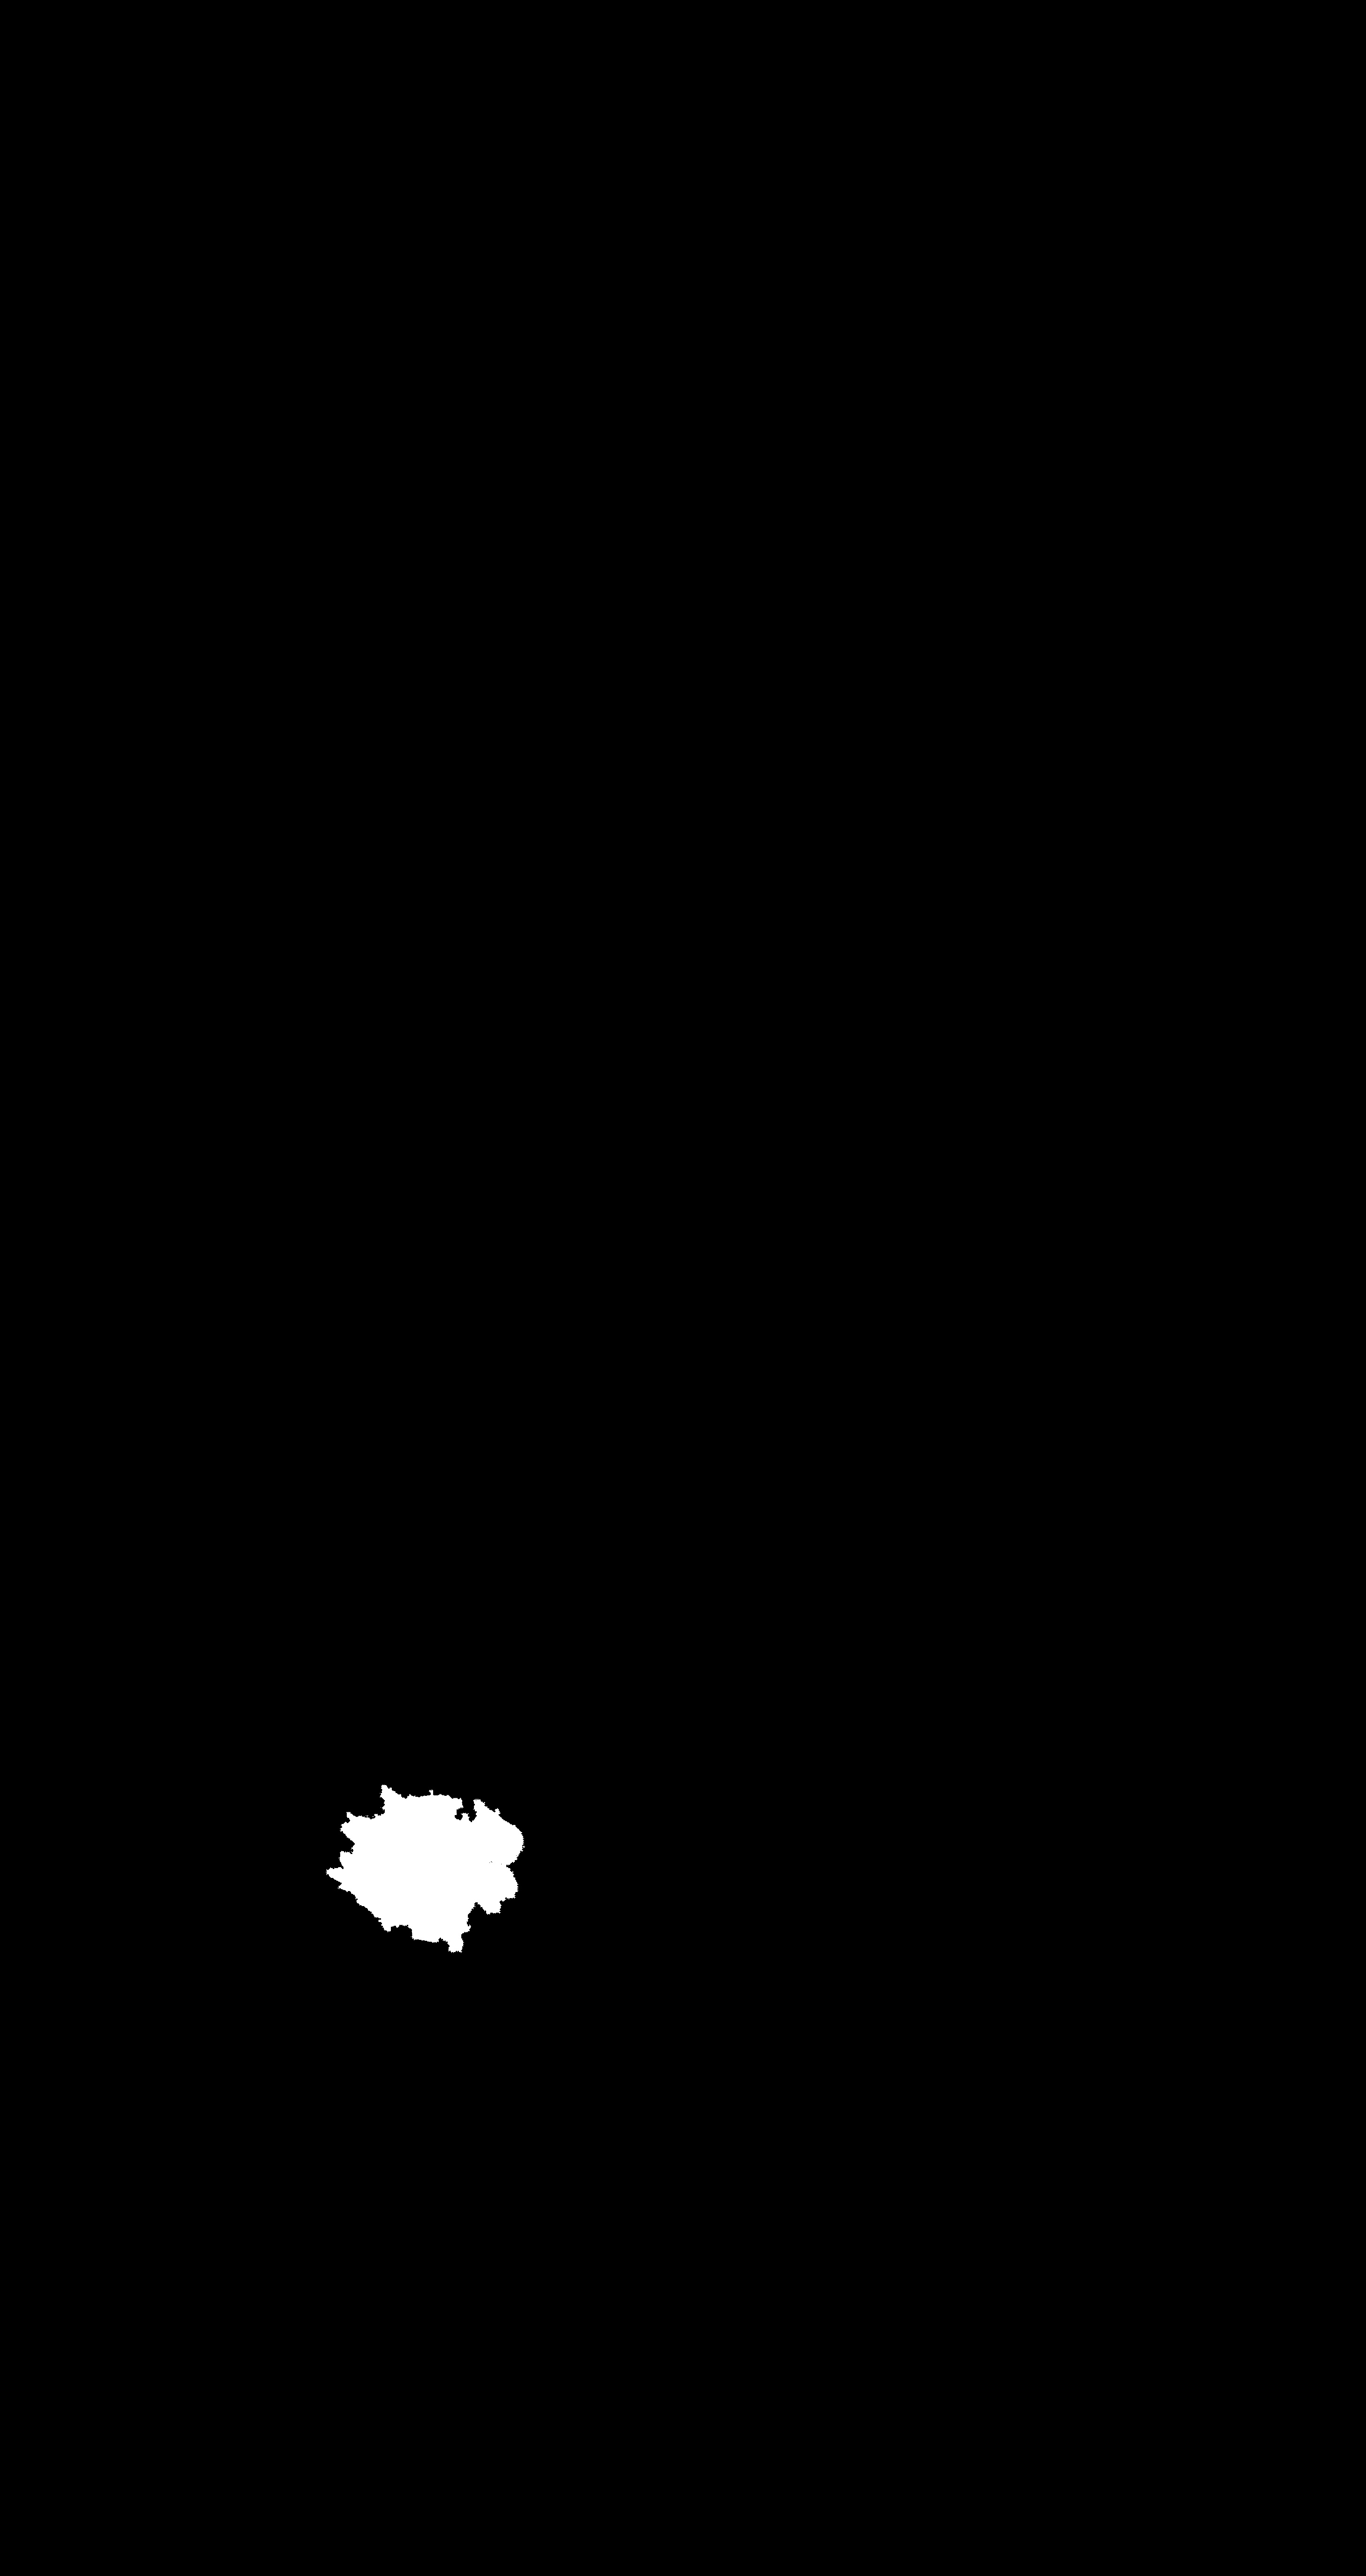

In [ ]:
_Imgdis(folder,width=256,height=256)

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/CBIS-DDSM/jpeg_shape_classes/train/*')
print(len(folders))

4


# Define Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(64,64,1))
x = layers.Conv2D(filters= 64, kernel_size = (7,7),padding='valid',activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Conv2D(filters= 128, kernel_size = (5,5),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Conv2D(filters= 256, kernel_size = (3,3),activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Conv2D(filters= 256, kernel_size = (3,3),activation='relu')(x)
x = layers.Conv2D(filters= 256, kernel_size = (3,3),activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(units= 128, activation='relu')(x)
x = layers.Dropout(rate= 0.5)(x)
x = layers.Dense(units= 64, activation='relu')(x)
outputs = layers.Dense(units= 4, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="shape_classifier")
model.summary()

Model: "shape_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 58, 58, 64)        3200      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 29, 29, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 256)  

In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
data_gen = image.ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
train_set = data_gen.flow_from_directory(train_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical',color_mode='grayscale')
test_set = data_gen.flow_from_directory(test_path, target_size= (64,64), batch_size = 32, class_mode= 'categorical',color_mode='grayscale')

Found 1145 images belonging to 4 classes.
Found 331 images belonging to 4 classes.


In [ ]:
test_set[0]

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='./VGG.h5',verbose=2,save_best_only=True)

callbacks = [checkpoint]

In [ ]:
history = model.fit(train_set,epochs=50,callbacks=callbacks,validation_data=test_set)

Epoch 1/50
36/36 [==============================] - ETA: 0s - loss: 1.7051 - accuracy: 0.3214
Epoch 1: val_loss improved from inf to 1.35153, saving model to ./VGG.h5
36/36 [==============================] - 54s 1s/step - loss: 1.7051 - accuracy: 0.3214 - val_loss: 1.3515 - val_accuracy: 0.3021
Epoch 2/50
36/36 [==============================] - ETA: 0s - loss: 1.3483 - accuracy: 0.3179
Epoch 2: val_loss improved from 1.35153 to 1.32934, saving model to ./VGG.h5
36/36 [==============================] - 49s 1s/step - loss: 1.3483 - accuracy: 0.3179 - val_loss: 1.3293 - val_accuracy: 0.3505
Epoch 3/50
36/36 [==============================] - ETA: 0s - loss: 1.3437 - accuracy: 0.3135
Epoch 3: val_loss did not improve from 1.32934
36/36 [==============================] - 50s 1s/step - loss: 1.3437 - accuracy: 0.3135 - val_loss: 1.3335 - val_accuracy: 0.3565
Epoch 4/50
36/36 [==============================] - ETA: 0s - loss: 1.3264 - accuracy: 0.3371
Epoch 4: val_loss did not improve from 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_my_Model.jpg', dpi = 400)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_my_Model.jpg', dpi = 400)

In [ ]:
y_test =test_set.labels
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.4278703 , 0.23767753, 0.24033141, 0.09412069],
       [0.292131  , 0.28715274, 0.29988983, 0.1208264 ],
       [0.40897223, 0.24273625, 0.24711034, 0.10118112],
       ...,
       [0.44008034, 0.2346788 , 0.23654972, 0.08869116],
       [0.39759135, 0.24582762, 0.25404117, 0.10253993],
       [0.31587195, 0.27391365, 0.28701887, 0.12319554]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred_proccessed = []
for i in y_pred:
    index_max = np.argmax(i)
    y_pred_proccessed.append(index_max)

y_pred_proccessed = np.array(y_pred_proccessed, dtype= np.float32)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred_proccessed)

In [ ]:
import seaborn as sn
import pandas as pd

In [ ]:
df_cm = pd.DataFrame(matrix, index = [i for i in ['round', 'oval', 'lobulated', 'irregular']],
                  columns = [i for i in ['round', 'oval', 'lobulated', 'irregular']])

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='BuPu')
plt.savefig('confmatrix_My_model.jpg',dpi=400)